You can find the Burapha Spine Dataset form this link : https://services.informatics.buu.ac.th/spine/

In [3]:
import os
from glob import glob
import pandas as pd
import numpy as np

In [4]:
paths = {
  'AP_PATH': os.path.join('spine_dataset','AP'),
  'LA_PATH': os.path.join('spine_dataset','LA'),
}

ดึงข้อมูลจาก csv เข้า dict 

In [5]:
def getcoordinate_AP(df_data):
  df_np = df_data.values
  df_np = np.array(np.around(df_np),dtype=np.int16)
  Lumbars_AP = {
    'L1':{
      'a':{'1':(df_np[0][0], df_np[0][1]),'2':(df_np[0][2], df_np[0][3])},
      'b':{'1':(df_np[1][0], df_np[1][1]),'2':(df_np[1][2], df_np[1][3])},
      'diag_num':df_np[1][4]
    },
    'L2':{
      'a':{'1':(df_np[2][0], df_np[2][1]),'2':(df_np[2][2], df_np[2][3])},
      'b':{'1':(df_np[3][0], df_np[3][1]),'2':(df_np[3][2], df_np[3][3])},
      'diag_num':df_np[3][4]
    },
    'L3':{
      'a':{'1':(df_np[4][0], df_np[4][1]),'2':(df_np[4][2], df_np[4][3])},
      'b':{'1':(df_np[5][0], df_np[5][1]),'2':(df_np[5][2], df_np[5][3])},
      'diag_num':df_np[5][4]
    },
    'L4':{
      'a':{'1':(df_np[6][0], df_np[6][1]),'2':(df_np[6][2], df_np[6][3])},
      'b':{'1':(df_np[7][0], df_np[7][1]),'2':(df_np[7][2], df_np[7][3])},
      'diag_num':df_np[7][4]
    },
    'L5':{
      'a':{'1':(df_np[8][0], df_np[8][1]),'2':(df_np[8][2], df_np[8][3])},
      'b':{'1':(df_np[9][0], df_np[9][1]),'2':(df_np[9][2], df_np[9][3])},
      'diag_num':df_np[9][4]
    }
  }
  return Lumbars_AP


In [6]:
Lumbars = {}
for i in (glob(paths['AP_PATH']+'/*.csv')):
  df = pd.read_csv(i,header=None)
  filename = os.path.basename(i).split(".")[0]
  Lumbars[filename] = getcoordinate_AP(df)

ใช้ dict "Lumbars" ในการตีขอบของข้อกระดูกแต่ละข้อในรูป

In [7]:
import cv2
import matplotlib.pyplot as plt

0001-F-037Y0
L1:blue, L2:orange, L3:green, L4:'red', L5:purple


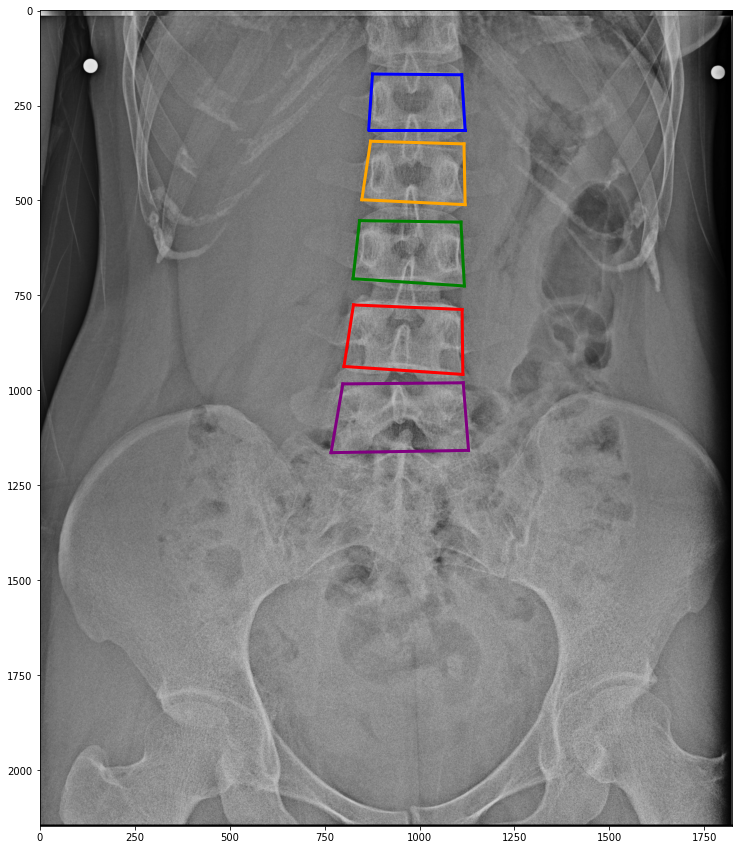

In [8]:
def drawpoints(point1, point2):
  p1 = [point1[0],point2[0]]
  p2 = [point1[1],point2[1]]
  return p1, p2

colors_text = {'L1':'blue', 'L2':'orange', 'L3':'green', 'L4':'red', 'L5':'purple'}
for i in (glob(paths['AP_PATH']+'/*.jpg')):
  filename = os.path.basename(i).split(".")[0]
  print(filename)
  print("L1:blue, L2:orange, L3:green, L4:'red', L5:purple")
  plt.figure(figsize = (100,15))
  for j in ['L1', 'L2', 'L3', 'L4', 'L5']:
    rectangle = [
      Lumbars[filename][j]['a']['1'], Lumbars[filename][j]['a']['2'],
      Lumbars[filename][j]['b']['1'], Lumbars[filename][j]['b']['2']
    ]
    color_text = colors_text[j]
    p1, p2 = drawpoints(rectangle[0],rectangle[1])
    x = [p1, p2]
    plt.plot(p1, p2, color=color_text, linewidth=3)
    p1, p2 = drawpoints(rectangle[1],rectangle[3])
    plt.plot(p1, p2, color=color_text, linewidth=3)
    p1, p2 = drawpoints(rectangle[3],rectangle[2])
    y = [p1, p2]
    plt.plot(p1, p2, color=color_text, linewidth=3)
    p1, p2 = drawpoints(rectangle[2],rectangle[0])
    plt.plot(p1, p2, color=color_text, linewidth=3)
  img = cv2.imread(i)
  plt.imshow(img)
  plt.show()
  break 


